In [1]:
#LetsGrowMore 
#Submitted By Prachi Adlak - Data Science Intern
#Task 1 - Iris Flower Classification ML Project
#Dataset Used: http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

In [32]:
#reading data
iridata = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
iridata.head()
iridata.tail()

,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [33]:
iridata.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [34]:
iridata.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iridata.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
#Exploratory data analysis 

In [35]:
iridata.shape

(149, 5)

In [36]:
iridata.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [37]:
iridata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   class         149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [38]:
iridata.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

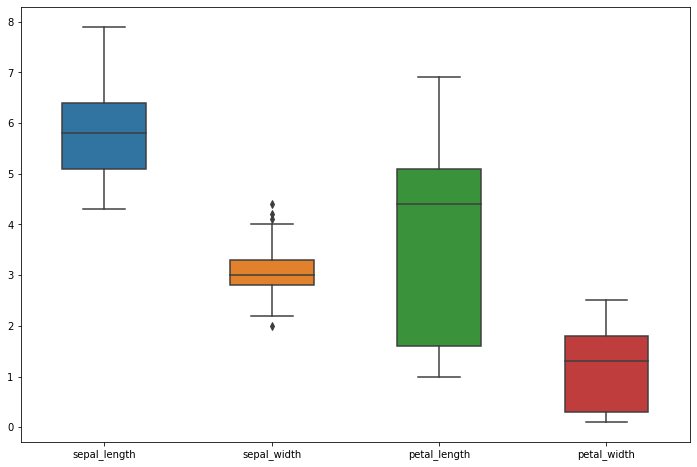

In [39]:
#visualization 
plt.figure(figsize = (12, 8))
sns.boxplot(data = iridata, width = 0.5, fliersize = 5)
plt.show()

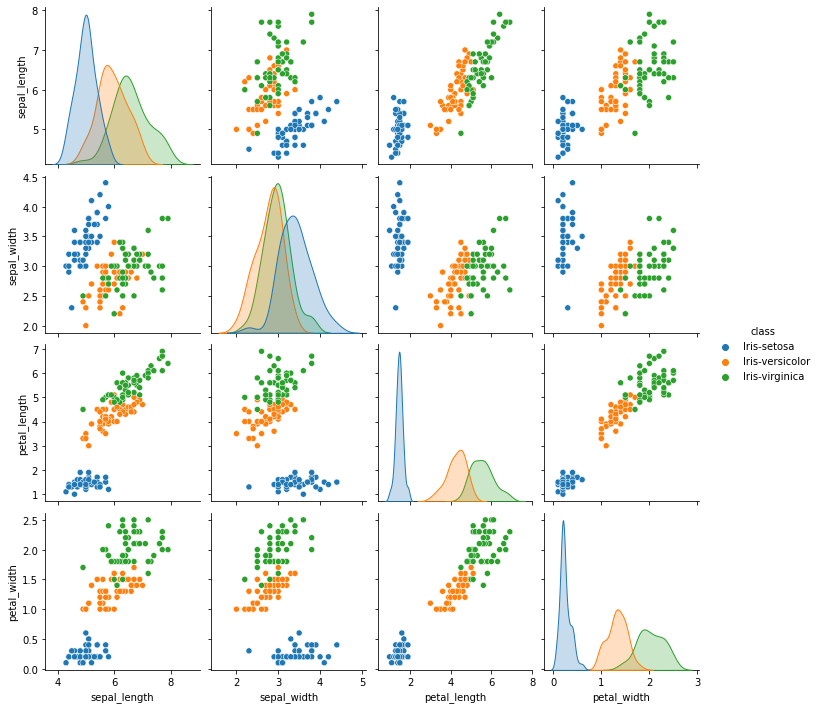

In [27]:
sns.pairplot(data,hue="class")

<AxesSubplot:ylabel='petal_width'>

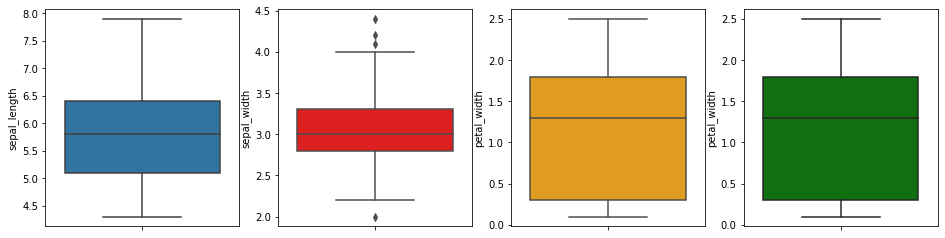

In [42]:
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.boxplot(data=iridata,y='sepal_length')
plt.subplot(1,4,2)
sns.boxplot(data=iridata,y='sepal_width',color='red')
plt.subplot(1,4,3)
sns.boxplot(data=iridata,y='petal_width',color='orange')
plt.subplot(1,4,4)
sns.boxplot(data=iridata,y='petal_width',color='green')

In [ ]:
#coorelation

In [40]:
corr = iridata.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.103784,0.871283,0.816971
sepal_width,-0.103784,1.000000,-0.415218,-0.350733
petal_length,0.871283,-0.415218,1.000000,0.962314
petal_width,0.816971,-0.350733,0.962314,1.000000


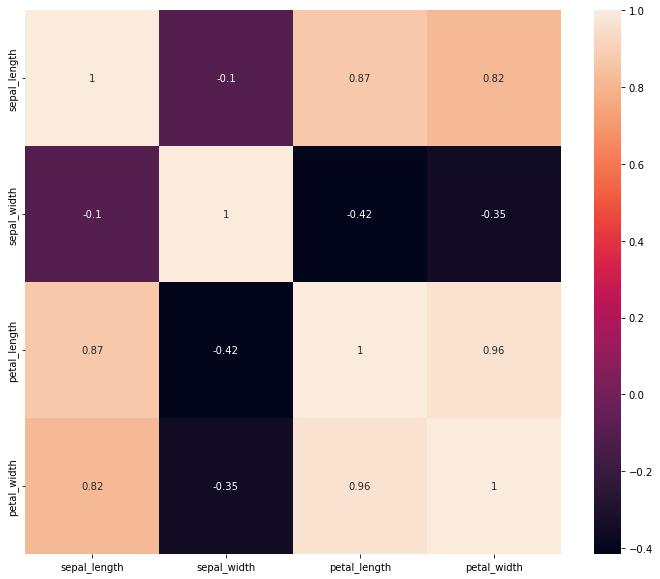

In [31]:
# PLotting it into Heatmap
plt.figure(figsize = (12, 10))
sns.heatmap(corr, annot = True)
plt.show()

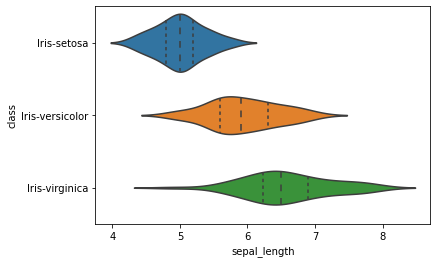

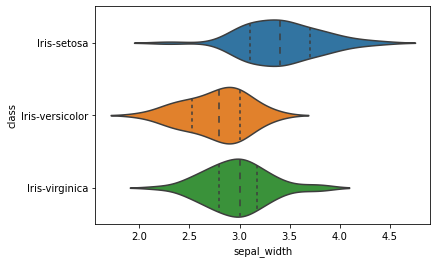

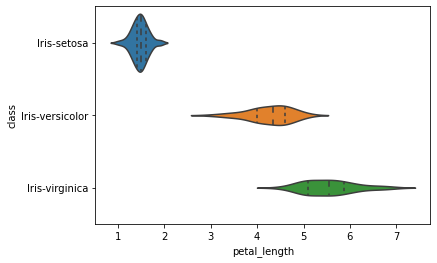

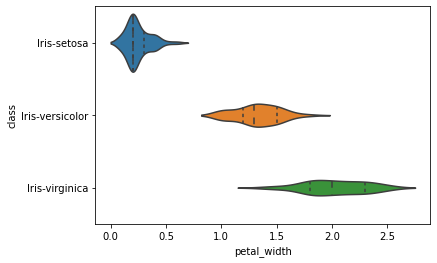

In [41]:
# Violin Plot
sns.violinplot(y='class', x='sepal_length', data=iridata, inner='quartile')
plt.show()
sns.violinplot(y='class', x='sepal_width', data=iridata, inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal_length', data=iridata, inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal_width', data=iridata, inner='quartile')
plt.show()

In [43]:
#data split
X = iridata.drop(['class'], axis = 1)
y = iridata['class']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = []
model.append(('SVC', SVC(gamma = 'auto')))


In [45]:
model  = SVC(gamma = 'auto')
model.fit(X_train, y_train)

SVC(gamma='auto')

In [46]:
#prediction
prediction = model.predict(X_test)
# Printing Accuracy Score and Classification Report for our model
print('Test Accuracy Score is: ', accuracy_score(y_test, prediction))
print('\n')
print('Classification Report: ', classification_report(y_test, prediction))

Test Accuracy Score is:  0.9333333333333333


Classification Report:                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.78      0.88         9
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



For the model we built, the accuracy score is 0.93 that is our predictions are 93% accurate.